In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from aux_ad_ent_qed_cv import *

The Hamiltonian of the system (two atoms of two levels energy interacting with the sigle mode field), in the interaction picture, is given by
$$
\mathcal{H}_I(\tau) = \sum_{j=1}^2\eta_j(\tau)(a^{\dagger}\sigma_j^- + a\sigma_j^+),
$$
where the coupling constants are
$$
\eta_1(\tau) = g e^{-(\tau+\delta)^2}\hspace{1cm} \mbox{and} \hspace{1cm} \eta_2(\tau) = g e^{-(\tau-\delta)^2}
$$
In the bare states basis $\{|n,e_1,e_2\rangle, |n+1, g_1, e_2\rangle, |n+1, e_1, g_2\rangle, |n+2,g_1,g_2\rangle \}$, it can be write as
\begin{equation}
\mathcal{H}_I(\tau) = 
\left(
\begin{matrix}
0  & \eta_1\sqrt{n+1} & \eta_2\sqrt{n+1} & 0\\
\eta_1\sqrt{n+1} & 0 & 0 & \eta_2\sqrt{n+2}\\
\eta_2\sqrt{n+1} & 0 & 0 & \eta_1\sqrt{n+2}\\
0  & \eta_2\sqrt{n+2} & \eta_1\sqrt{n+2} & 0
\end{matrix}
\right)
\end{equation}
The energies of the system are:

$$
E_{1,2}(\tau) = \mp E_-(\tau), \hspace{1cm} E_{3,4}(\tau) = \mp E_+(\tau), 
$$
with
$$
E_{\pm}(\tau) = \sqrt{\frac{(3+2n)[\eta_1^2(\tau)+\eta_2^2(\tau)]\pm F_n(\tau)}{2}},
$$
and
$$
F_n(\tau) = \sqrt{[\eta_1^2(\tau)+\eta_2^2(\tau)]^2+16(n+1)(n+2)\eta_1^2(\tau)\eta_2^2(\tau)}
$$

The eigenstates are given by
$$
|\Psi_{1,2}(\tau)\rangle = A_-(\tau)|n,e_1,e_2\rangle+D_-(\tau)|n+2,g_1,g_2\rangle\pm\left(B_-(\tau)|n+1,g_1,e_2\rangle-C_-(\tau)|n+1,e_1,g_2\rangle\right)
$$
and
$$
|\Psi_{3,4}(\tau)\rangle = A_+(\tau)|n,e_1,e_2\rangle+D_+(\tau)|n+2,g_1,g_2\rangle\pm\left(B_+(\tau)|n+1,g_1,e_2\rangle-C_+(\tau)|n+1,e_1,g_2\rangle\right),
$$
where the coefficients are defined as
$$
A_{\pm}(\tau) = \pm\sqrt{\frac{4(n+1)(n+2)\eta_1^2\eta_2^2}{F_n^2(\tau)\pm(\eta_1^2+\eta_2^2)F_n(\tau)}},
$$
$$
B{\pm} = \frac{D_{\pm}(\tau)E_{\pm}(\tau)[\eta_1^2-\eta_2^2\mp F_n(\tau)]}{2\eta_2\sqrt{n+2}[E_{\pm}^2(\tau)+(n+1)(\eta_1^2-\eta_2^2)]},
$$
$$
C_{\pm}(\tau) = \frac{D_{\pm}(\tau)E_{\pm}(\tau)\eta_1(3+2n)}{\sqrt{n+2}[E_{\pm}^2(\tau)+(n+1)(\eta_1^2-\eta_2^2)]}
$$
and
$$
D_{\pm}(\tau)=\frac{1}{2}\sqrt{1\pm\frac{\eta_1^2+\eta_2^2}{F_n(\tau)}}.
$$
For $\tau=\pm \infty$, it is assumed that
$$
 \lim_{\tau\to\infty} \left(\frac{\eta_1^2}{\eta_2^2}\right)=0 \hspace{1cm}\mbox{and}\hspace{1cm}\lim_{\tau\to-\infty} \left(\frac{\eta_2^2}{\eta_1^2}\right)=0,
$$
and we obtain the following adiabatic eigenstates
$$
|\Psi_{1,2}(\tau)\rangle = -\frac{1}{\sqrt{2}}\left\{
\begin{array}{lll}
|n,e_1,e_2\rangle \mp |n+1,g_1,e_2\rangle & \mbox{for} & \tau \rightarrow -\infty,\\
|n,e_1,e_2\rangle \mp |n+1,e_1,g_2\rangle & \mbox{for} & \tau \rightarrow \infty
\end{array}
\right.
$$
and
$$
|\Psi_{3,4}(\tau)\rangle = -\frac{1}{\sqrt{2}}\left\{
\begin{array}{lll}
|n+2,g_1,g_2\rangle \mp |n+1,e_1,g_2\rangle & \mbox{for} & \tau \rightarrow -\infty,\\
|n+2,g_1,g_2\rangle \mp |n+1,g_1,e_2\rangle & \mbox{for} & \tau \rightarrow \infty
\end{array}
\right.
$$


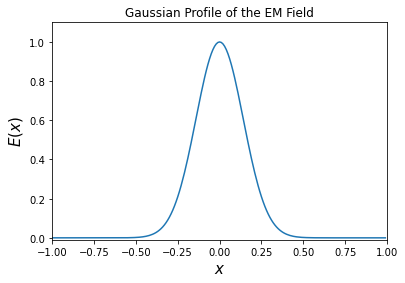

In [2]:
x = np.arange(-1,1,0.01)
EM_field = gauss_prof(x,0.1,1)
plt.plot(x,EM_field)
plt.xlim(-1, 1)
plt.ylim(-0.01, 1.1)
plt.title('Gaussian Profile of the EM Field')
plt.xlabel('$x$', size=15)
plt.ylabel('$E(x)$', size=15)
plt.show()

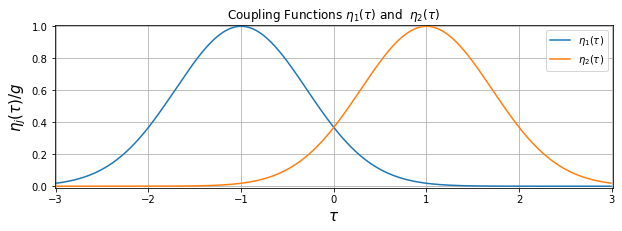

In [3]:
tau_p1 = np.arange(-3,3,0.01)
plt.figure(figsize=(10,3))
plt.plot(tau_p1, coupl(1, 1, tau_p1, delta=1.0), label = r'$\eta_1(\tau)$')
plt.plot(tau_p1, coupl(2, 1, tau_p1, 1.0), label = r'$\eta_2(\tau)$')
plt.xlabel(r'$\tau$', size=15)
plt.ylabel(r'$\eta_j(\tau)/g$', size=15)
plt.xlim(-3.01, 3.01)
plt.ylim(-0.01, 1.01)
plt.legend()
plt.title(r'Coupling Functions $\eta_1(\tau)$ and  $\eta_2(\tau)$') 
plt.grid(True)
plt.show()

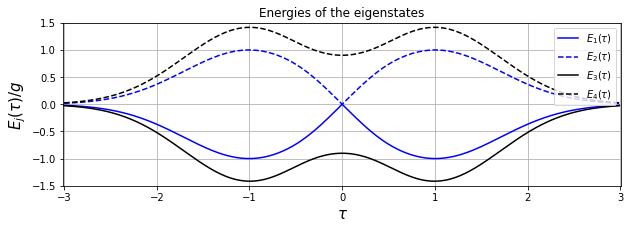

In [4]:
E1 = -energy_m(0, 1, tau_p1, delta=1.0)
E2 = energy_m(0, 1, tau_p1, delta=1.0)
E3 = -energy_p(0, 1, tau_p1, delta=1.0)
E4 = energy_p(0, 1, tau_p1, delta=1.0)
plt.figure(figsize=(10,3))
plt.plot(tau_p1, E1,'-',color='blue',label=r'$E_1(\tau)$')
plt.plot(tau_p1, E2,'--',color='blue',label=r'$E_2(\tau)$')
plt.plot(tau_p1, E3,'-',color='black',label=r'$E_3(\tau)$')
plt.plot(tau_p1, E4,'--',color='black',label=r'$E_4(\tau)$')
plt.xlabel(r'$\tau$', size=15)
plt.ylabel(r'$E_j(\tau)/g$', size=15)
plt.xlim(-3.01, 3.01)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.title('Energies of the eigenstates') 
plt.grid(True)
plt.show()